In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('FFFF.csv')
df

,DATE,Target WL,SBDWL2,BRWL1,HTDWL2,KRWL1,LaRWL1,LRWL1,SDDWL2,WTDWL2,...,C2RS7,C2RS14,C2RSF,C3RS,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF
0,01-01-2010,84.922581,NaN,20.702496,NaN,NaN,NaN,9.500000,NaN,246.466571,...,0.046003,0.100000,7,0.7,7.679192,3.029077,0.217122,0.992182,0.000000,7
1,02-01-2010,71.048611,NaN,15.115741,NaN,NaN,NaN,NaN,NaN,246.299333,...,0.000000,5.937092,7,5.8,8.262197,0.135959,0.000000,5.544645,3.502215,7
2,03-01-2010,57.480645,NaN,11.142248,NaN,NaN,NaN,7.300000,NaN,246.277667,...,1.705466,0.000000,7,0.2,0.091254,0.000000,0.238249,0.756802,3.020568,7
3,04-01-2010,52.046032,NaN,10.187172,NaN,NaN,NaN,NaN,NaN,246.241000,...,1.894282,3.191169,0,0.0,0.000000,0.235536,0.458457,0.597183,2.181716,7
4,05-01-2010,40.793939,NaN,7.289063,NaN,NaN,NaN,NaN,NaN,246.241000,...,0.133828,0.000000,0,0.0,1.284342,0.676833,0.014221,0.078738,0.266983,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,31-10-2019,19.093679,196.994211,2.451022,267.178,86.712857,103.597468,7.748583,NaN,243.956000,...,3.602407,1.930565,6,0.0,0.000000,5.419976,3.506746,3.325564,0.000000,0
3584,01-11-2019,19.529924,196.891379,2.425664,NaN,85.955160,103.860897,8.566926,NaN,243.894750,...,1.247558,0.692614,6,14.4,9.863716,3.995350,4.262794,6.858315,0.057173,4
3585,02-11-2019,23.127991,197.079180,2.838053,267.170,84.285512,106.528125,10.302299,NaN,243.906556,...,3.975002,0.898759,6,4.0,5.495787,6.515957,9.035480,8.010911,0.211898,4
3586,03-11-2019,20.716932,196.982917,2.484042,267.160,83.536140,104.476730,8.928016,NaN,243.963727,...,1.443575,16.564550,6,5.5,9.400042,7.090957,4.963055,3.590645,10.923110,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       3588 non-null   object 
 1   Target WL  3588 non-null   float64
 2   SBDWL2     2742 non-null   float64
 3   BRWL1      3509 non-null   float64
 4   HTDWL2     1474 non-null   float64
 5   KRWL1      422 non-null    float64
 6   LaRWL1     3387 non-null   float64
 7   LRWL1      3380 non-null   float64
 8   SDDWL2     1805 non-null   float64
 9   WTDWL2     3366 non-null   float64
 10  C1RS       3588 non-null   float64
 11  C1RS1      3588 non-null   float64
 12  C1RS2      3588 non-null   float64
 13  C1RS3      3588 non-null   float64
 14  C1RS7      3588 non-null   float64
 15  C1RS14     3588 non-null   float64
 16  C1RSF      3588 non-null   int64  
 17  C2RS       3588 non-null   float64
 18  C2RS1      3588 non-null   float64
 19  C2RS2      3588 non-null   float64
 20  C2RS3   

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%d-%m-%Y")

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

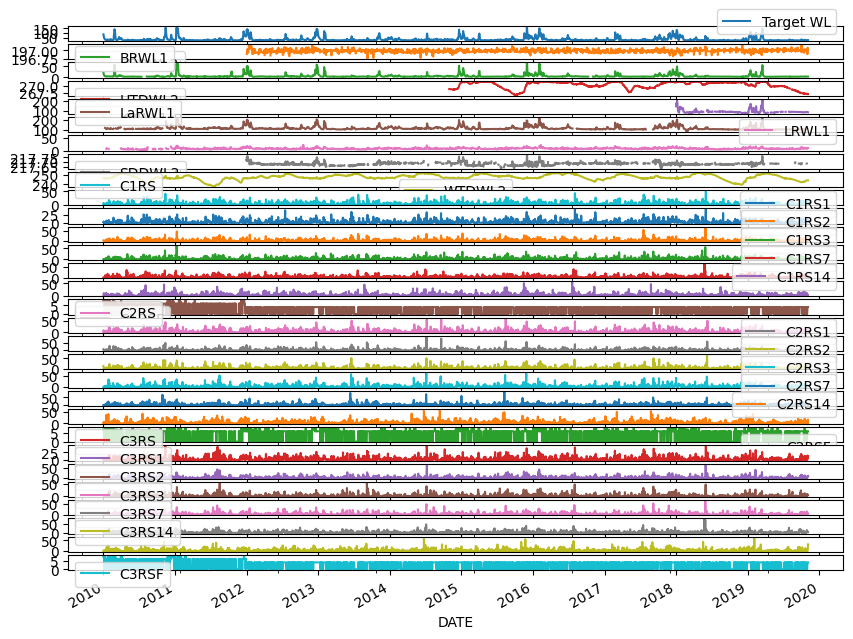

In [5]:
df.set_index('DATE').plot(subplots=True)

In [42]:
df_input=df[['Target WL','BRWL1','LaRWL1','LRWL1','WTDWL2','C1RS','C1RS1','C1RS2','C1RS3','C1RS7','C1RS14','C1RSF','C2RS','C2RS1','C2RS2','C2RS3','C2RS7','C2RS14','C2RSF','C3RS','C3RS1','C3RS2','C3RS3','C3RS7','C3RS14','C3RSF']]

In [44]:
df_input=df_input.fillna(method = 'bfill')
df_input

,Target WL,BRWL1,LaRWL1,LRWL1,WTDWL2,C1RS,C1RS1,C1RS2,C1RS3,C1RS7,...,C2RS7,C2RS14,C2RSF,C3RS,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF
0,84.922581,20.702496,117.212338,9.500000,246.466571,0.3,2.216984,2.809389,0.118107,0.144913,...,0.046003,0.100000,7,0.7,7.679192,3.029077,0.217122,0.992182,0.000000,7
1,71.048611,15.115741,117.212338,7.300000,246.299333,6.3,4.119857,0.138676,0.100000,1.494333,...,0.000000,5.937092,7,5.8,8.262197,0.135959,0.000000,5.544645,3.502215,7
2,57.480645,11.142248,117.212338,7.300000,246.277667,0.2,0.172228,0.100000,1.324406,1.080249,...,1.705466,0.000000,7,0.2,0.091254,0.000000,0.238249,0.756802,3.020568,7
3,52.046032,10.187172,117.212338,6.600000,246.241000,0.1,0.100000,0.298556,0.000000,0.232413,...,1.894282,3.191169,0,0.0,0.000000,0.235536,0.458457,0.597183,2.181716,7
4,40.793939,7.289063,117.212338,6.600000,246.241000,0.1,0.463042,0.692555,0.108253,0.033478,...,0.133828,0.000000,0,0.0,1.284342,0.676833,0.014221,0.078738,0.266983,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,19.093679,2.451022,103.597468,7.748583,243.956000,0.0,9.161683,6.862736,4.347939,4.206158,...,3.602407,1.930565,6,0.0,0.000000,5.419976,3.506746,3.325564,0.000000,0
3584,19.529924,2.425664,103.860897,8.566926,243.894750,11.8,5.182064,5.157373,7.208479,0.000000,...,1.247558,0.692614,6,14.4,9.863716,3.995350,4.262794,6.858315,0.057173,4
3585,23.127991,2.838053,106.528125,10.302299,243.906556,4.9,4.520576,5.628847,7.983038,3.084470,...,3.975002,0.898759,6,4.0,5.495787,6.515957,9.035480,8.010911,0.211898,4
3586,20.716932,2.484042,104.476730,8.928016,243.963727,4.3,12.117782,15.424044,3.683143,3.372005,...,1.443575,16.564550,6,5.5,9.400042,7.090957,4.963055,3.590645,10.923110,4


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

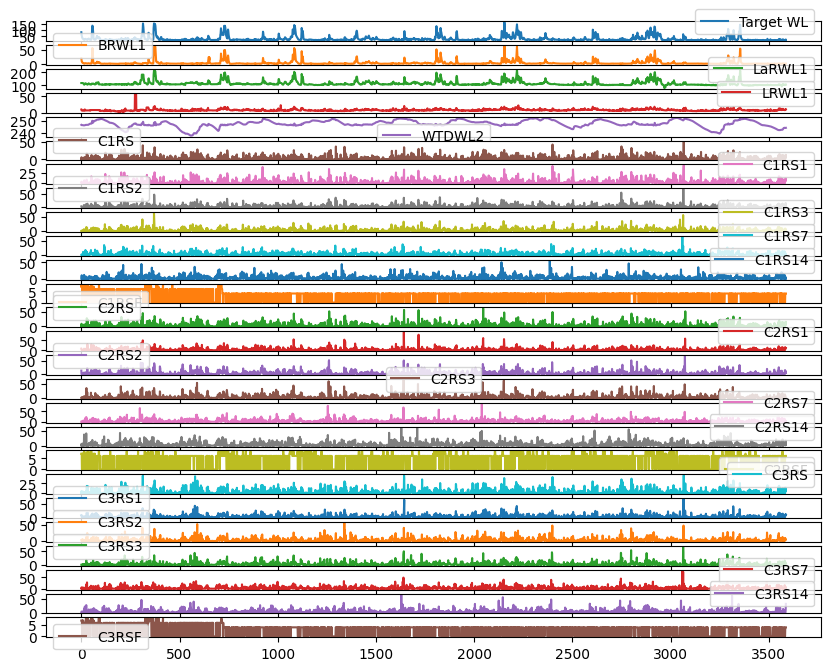

In [9]:
df_input.plot(subplots=True)

In [10]:
df_input.describe()

,Target WL,BRWL1,LaRWL1,LRWL1,WTDWL2,C1RS,C1RS1,C1RS2,C1RS3,C1RS7,...,C2RS7,C2RS14,C2RSF,C3RS,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF
count,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,...,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000
mean,29.852173,5.249434,114.232975,7.902307,247.470599,2.671628,2.793895,2.779187,2.801961,2.774178,...,3.448966,3.443450,3.691750,2.779599,2.812308,2.824273,2.931225,2.910451,2.958124,2.520067
std,20.457605,6.932138,16.638477,3.168611,2.786887,4.922697,4.780685,4.856702,4.939897,4.662745,...,6.028729,5.805360,3.125258,5.211937,5.049566,5.107247,5.486678,5.083787,5.198531,2.302564
min,17.577167,1.068370,79.850000,2.647250,237.690500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.822624,2.503493,104.954567,6.300000,246.330071,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.836759,2.873828,108.255230,7.295183,247.282500,0.200000,0.517439,0.502384,0.485867,0.677829,...,0.831480,0.933016,6.000000,0.200000,0.467959,0.438220,0.453881,0.699274,0.692857,4.000000
75%,28.723380,4.494067,117.060151,8.715047,249.622333,3.300000,3.679355,3.789242,3.753647,3.602536,...,4.599941,4.544095,6.000000,3.400000,3.710517,3.727859,3.659913,3.880597,3.829895,4.000000
max,169.489966,64.165805,217.503597,57.350000,252.464652,51.700000,43.820207,66.627096,63.958702,64.027574,...,86.052820,60.219748,8.000000,45.900000,67.633370,55.085617,65.962542,78.228205,64.395035,8.000000


In [11]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [12]:
data_scaled

array([[0.44331626, 0.31117155, 0.27142289, ..., 0.01268317, 0.        ,
        0.875     ],
       [0.35198775, 0.22262983, 0.27142289, ..., 0.07087782, 0.05438641,
        0.875     ],
       [0.26267358, 0.15965591, 0.27142289, ..., 0.00967429, 0.04690684,
        0.875     ],
       ...,
       [0.03653954, 0.02804683, 0.19380623, ..., 0.10240438, 0.0032906 ,
        0.5       ],
       [0.02066821, 0.02243629, 0.17890364, ..., 0.04589963, 0.16962659,
        0.5       ],
       [0.02073022, 0.02522725, 0.18170201, ..., 0.04860675, 0.47790472,
        0.5       ]])

In [13]:
features=data_scaled
target=data_scaled[:,0]

In [14]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[4.43316261e-01, 3.11171548e-01, 2.71422894e-01, 1.25272495e-01,
          5.94015229e-01, 5.80270793e-03, 5.05927312e-02, 4.21658571e-02,
          1.84661478e-03, 2.26328840e-03, 1.46554139e-03, 8.75000000e-01,
          1.78861789e-02, 9.08709836e-02, 1.90593366e-01, 0.00000000e+00,
          5.34594718e-04, 1.66058484e-03, 8.75000000e-01, 1.52505447e-02,
          1.13541467e-01, 5.49885198e-02, 3.29159588e-03, 1.26831734e-02,
          0.00000000e+00, 8.75000000e-01],
         [3.51987751e-01, 2.22629831e-01, 2.71422894e-01, 8.50551389e-02,
          5.82695588e-01, 1.21856867e-01, 9.40172862e-02, 2.08137645e-03,
          1.56350890e-03, 2.33388901e-02, 7.66500395e-02, 1.00000000e+00,
          1.46341463e-01, 8.48018890e-02, 2.69581375e-04, 0.00000000e+00,
          0.00000000e+00, 9.85904463e-02, 8.75000000e-01, 1.26361656e-01,
          1.22161542e-01, 2.46814455e-03, 0.00000000e+00, 7.08778194e-02,
          5.43864106e-02, 8.75000000e-01]]]),
 array([0.26267358]))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=123, shuffle = False)

In [16]:
x_train.shape

(3049, 26)

In [17]:
x_test.shape

(539, 26)

In [90]:
win_length=7
batch_size=1
num_features=26
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [91]:
train_generator[0]

(array([[[4.43316261e-01, 3.11171548e-01, 2.71422894e-01, 1.25272495e-01,
          5.94015229e-01, 5.80270793e-03, 5.05927312e-02, 4.21658571e-02,
          1.84661478e-03, 2.26328840e-03, 1.46554139e-03, 8.75000000e-01,
          1.78861789e-02, 9.08709836e-02, 1.90593366e-01, 0.00000000e+00,
          5.34594718e-04, 1.66058484e-03, 8.75000000e-01, 1.52505447e-02,
          1.13541467e-01, 5.49885198e-02, 3.29159588e-03, 1.26831734e-02,
          0.00000000e+00, 8.75000000e-01],
         [3.51987751e-01, 2.22629831e-01, 2.71422894e-01, 8.50551389e-02,
          5.82695588e-01, 1.21856867e-01, 9.40172862e-02, 2.08137645e-03,
          1.56350890e-03, 2.33388901e-02, 7.66500395e-02, 1.00000000e+00,
          1.46341463e-01, 8.48018890e-02, 2.69581375e-04, 0.00000000e+00,
          0.00000000e+00, 9.85904463e-02, 8.75000000e-01, 1.26361656e-01,
          1.22161542e-01, 2.46814455e-03, 0.00000000e+00, 7.08778194e-02,
          5.43864106e-02, 8.75000000e-01],
         [2.62673579e-01, 

In [92]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 7, 128)            79360     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 7, 128)            0         
                                                                 
 lstm_10 (LSTM)              (None, 7, 128)            131584    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 7, 128)            0         
                                                                 
 dropout_6 (Dropout)         (None, 7, 128)            0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)               

In [94]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=5,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50


<ipython-input-94-2469c9e0bd9b>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50,


3042/3042 [==============================] - 70s 21ms/step - loss: 0.0114 - mean_absolute_error: 0.0628 - val_loss: 0.0091 - val_mean_absolute_error: 0.0532
Epoch 2/50
3042/3042 [==============================] - 62s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0627 - val_loss: 0.0118 - val_mean_absolute_error: 0.0529
Epoch 3/50
3042/3042 [==============================] - 64s 21ms/step - loss: 0.0072 - mean_absolute_error: 0.0490 - val_loss: 0.0032 - val_mean_absolute_error: 0.0419
Epoch 4/50
3042/3042 [==============================] - 62s 20ms/step - loss: 0.0051 - mean_absolute_error: 0.0412 - val_loss: 0.0022 - val_mean_absolute_error: 0.0326
Epoch 5/50
3042/3042 [==============================] - 62s 20ms/step - loss: 0.0030 - mean_absolute_error: 0.0340 - val_loss: 0.0019 - val_mean_absolute_error: 0.0302
Epoch 6/50
3042/3042 [==============================] - 61s 20ms/step - loss: 0.0029 - mean_absolute_error: 0.0320 - val_loss: 0.0018 - val_mean_absolute_error: 0.0293
Epo

In [95]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-95-ef1e1eabfd74>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.0009234643657691777, 0.014294237829744816]

In [96]:
predictions=model.predict_generator(test_generator)

<ipython-input-96-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [97]:
predictions.shape[0]

532

In [98]:
predictions

array([[0.01162113],
       [0.01225956],
       [0.01429769],
       [0.01557694],
       [0.02101615],
       [0.02117985],
       [0.0156197 ],
       [0.01888338],
       [0.04259025],
       [0.24282566],
       [0.16267295],
       [0.103692  ],
       [0.2052128 ],
       [0.11880852],
       [0.0848319 ],
       [0.06248009],
       [0.05229497],
       [0.0845933 ],
       [0.14489827],
       [0.1024937 ],
       [0.15716515],
       [0.15381461],
       [0.08616474],
       [0.05786171],
       [0.04224497],
       [0.03228293],
       [0.02227101],
       [0.01509368],
       [0.01367433],
       [0.0113896 ],
       [0.0115023 ],
       [0.01401806],
       [0.01168963],
       [0.01283447],
       [0.01256027],
       [0.01276843],
       [0.01144252],
       [0.0104609 ],
       [0.01182804],
       [0.01140945],
       [0.00979628],
       [0.00993852],
       [0.00971709],
       [0.01026747],
       [0.01367585],
       [0.01586068],
       [0.01380333],
       [0.010

In [99]:
y_test

array([1.41318933e-02, 9.59378177e-03, 4.16322058e-02, 1.86281267e-02,
       9.37746840e-03, 9.92045352e-03, 1.01936613e-02, 1.02114792e-02,
       1.19208908e-02, 1.15630022e-02, 1.53446076e-02, 9.93662161e-03,
       9.34924010e-03, 1.12955379e-02, 1.23338034e-02, 3.32232321e-01,
       5.41692180e-02, 2.82717017e-02, 2.34114930e-01, 1.22400744e-01,
       6.15587408e-02, 4.11826173e-02, 4.43085335e-02, 4.66947128e-02,
       6.91611883e-02, 1.05879456e-01, 8.61030848e-02, 1.91232266e-01,
       8.15404194e-02, 2.93233576e-02, 2.06222390e-02, 2.11286910e-02,
       1.63395467e-02, 2.20962983e-02, 1.30356373e-02, 1.16700722e-02,
       1.44244903e-02, 1.49873993e-02, 1.59548044e-02, 1.39221069e-02,
       1.30170925e-02, 1.29354180e-02, 1.32118154e-02, 1.36279016e-02,
       1.32071959e-02, 1.27862732e-02, 1.22531260e-02, 1.25510052e-02,
       1.17479300e-02, 1.10059915e-02, 1.31638442e-02, 1.72912120e-02,
       1.58025599e-02, 1.41358831e-02, 1.34693500e-02, 1.31435896e-02,
      

In [100]:
x_test

array([[0.01413189, 0.02585435, 0.18190589, ..., 0.00054205, 0.        ,
        0.        ],
       [0.00959378, 0.02636527, 0.17642799, ..., 0.0019021 , 0.        ,
        0.5       ],
       [0.04163221, 0.03249352, 0.19198389, ..., 0.0248687 , 0.04016009,
        0.5       ],
       ...,
       [0.03653954, 0.02804683, 0.19380623, ..., 0.10240438, 0.0032906 ,
        0.5       ],
       [0.02066821, 0.02243629, 0.17890364, ..., 0.04589963, 0.16962659,
        0.5       ],
       [0.02073022, 0.02522725, 0.18170201, ..., 0.04860675, 0.47790472,
        0.5       ]])

In [101]:
x_test[:,1:][win_length:]

array([[0.0266138 , 0.18228163, 0.05940019, ..., 0.00204699, 0.        ,
        0.5       ],
       [0.02780709, 0.18370273, 0.06350362, ..., 0.03374858, 0.00214674,
        0.5       ],
       [0.02777723, 0.18354616, 0.07123085, ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.02804683, 0.19380623, 0.13993901, ..., 0.10240438, 0.0032906 ,
        0.5       ],
       [0.02243629, 0.17890364, 0.11481627, ..., 0.04589963, 0.16962659,
        0.5       ],
       [0.02522725, 0.18170201, 0.13155782, ..., 0.04860675, 0.47790472,
        0.5       ]])

In [102]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [103]:
df_pred

,0,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0.011621,0.026614,0.182282,0.059400,0.886281,0.003868,0.000752,0.009725,0.063842,0.062144,...,0.005733,0.000781,0.75,0.002179,0.005693,0.026161,0.000000,0.002047,0.000000,0.5
1,0.012260,0.027807,0.183703,0.063504,0.879915,0.000000,0.003218,0.068140,0.135076,0.275319,...,0.091427,0.088785,0.75,0.006536,0.019188,0.042055,0.001253,0.033749,0.002147,0.5
2,0.014298,0.027777,0.183546,0.071231,0.874286,0.075435,0.099029,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.75,0.087146,0.018550,0.007670,0.000000,0.000000,0.000000,0.5
3,0.015577,0.029146,0.186840,0.074605,0.869717,0.085106,0.134458,0.000000,0.000000,0.354076,...,0.020253,0.287855,0.75,0.010893,0.004766,0.000000,0.001541,0.076465,0.135806,0.5
4,0.021016,0.025315,0.179400,0.067653,0.864637,0.000000,0.000000,0.000000,0.010537,1.000000,...,0.000000,0.218635,0.00,0.000000,0.000000,0.001017,0.001125,1.000000,0.043732,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0.011031,0.021913,0.172516,0.093256,0.424085,0.000000,0.209074,0.103002,0.067980,0.065693,...,0.041863,0.032059,0.75,0.000000,0.000000,0.098392,0.053163,0.042511,0.000000,0.0
528,0.021170,0.021511,0.174430,0.108215,0.419939,0.228240,0.118257,0.077407,0.112705,0.000000,...,0.014498,0.011501,0.75,0.313725,0.145841,0.072530,0.064624,0.087671,0.000888,0.5
529,0.037400,0.028047,0.193806,0.139939,0.420739,0.094778,0.103162,0.084483,0.124816,0.048174,...,0.046193,0.014925,0.75,0.087146,0.081259,0.118288,0.136979,0.102404,0.003291,0.5
530,0.030480,0.022436,0.178904,0.114816,0.424608,0.083172,0.276534,0.231498,0.057586,0.052665,...,0.016775,0.275068,0.75,0.119826,0.138985,0.128726,0.075241,0.045900,0.169627,0.5


In [104]:
rev_trans=scaler.inverse_transform(df_pred)

In [105]:
rev_trans

array([[ 19.34256543,   2.74763251, 104.9417219 , ...,   0.16013216,
          0.        ,   4.        ],
       [ 19.43955041,   2.82292606, 105.1373418 , ...,   2.64009113,
          0.13823962,   4.        ],
       [ 19.74916938,   2.82104211, 105.1157895 , ...,   0.        ,
          0.        ,   4.        ],
       ...,
       [ 23.25875625,   2.83805319, 106.528125  , ...,   8.01091084,
          0.21189832,   4.        ],
       [ 22.20747178,   2.4840424 , 104.4767296 , ...,   3.59064549,
         10.92311006,   4.        ],
       [ 25.46452962,   2.66014504, 104.8619355 , ...,   3.80241903,
         30.77469137,   4.        ]])

In [106]:
df_final=df_input[predictions.shape[0]*-1:]

In [107]:
df_final.count()

Target WL    532
BRWL1        532
LaRWL1       532
LRWL1        532
WTDWL2       532
C1RS         532
C1RS1        532
C1RS2        532
C1RS3        532
C1RS7        532
C1RS14       532
C1RSF        532
C2RS         532
C2RS1        532
C2RS2        532
C2RS3        532
C2RS7        532
C2RS14       532
C2RSF        532
C3RS         532
C3RS1        532
C3RS2        532
C3RS3        532
C3RS7        532
C3RS14       532
C3RSF        532
dtype: int64

In [108]:
df_final['WL_Pred']=rev_trans[:,0]

<ipython-input-108-1232e6044f07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['WL_Pred']=rev_trans[:,0]


In [109]:
df_final

,Target WL,BRWL1,LaRWL1,LRWL1,WTDWL2,C1RS,C1RS1,C1RS2,C1RS3,C1RS7,...,C2RS14,C2RSF,C3RS,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF,WL_Pred
3056,19.128421,2.747633,104.941722,5.896604,250.784556,0.2,0.032968,0.647922,4.083221,3.978957,...,0.047004,6,0.1,0.385013,1.441098,0.000000,0.160132,0.000000,4,19.342565
3057,19.388103,2.822926,105.137342,6.121073,250.690500,0.0,0.141034,4.539996,8.639306,17.628004,...,5.346623,6,0.3,1.297759,2.316621,0.082643,2.640091,0.138240,4,19.439550
3058,19.333735,2.821042,105.115790,6.543774,250.607333,3.9,4.339464,0.000000,0.000000,0.000000,...,0.000000,6,4.0,1.254565,0.422503,0.000000,0.000000,0.000000,4,19.749169
3059,19.908209,2.907423,105.569136,6.728352,250.539833,4.4,5.891992,0.000000,0.000000,22.670649,...,17.334555,6,0.5,0.322338,0.000000,0.101674,5.981685,8.745261,4,19.943504
3060,19.086667,2.665697,104.545033,6.348077,250.464778,0.0,0.000000,0.000000,0.673907,64.027574,...,13.166119,0,0.0,0.000000,0.056008,0.074230,78.228205,2.816106,0,20.769789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,19.093679,2.451022,103.597468,7.748583,243.956000,0.0,9.161683,6.862736,4.347939,4.206158,...,1.930565,6,0.0,0.000000,5.419976,3.506746,3.325564,0.000000,0,19.252977
3584,19.529924,2.425664,103.860897,8.566926,243.894750,11.8,5.182064,5.157373,7.208479,0.000000,...,0.692614,6,14.4,9.863716,3.995350,4.262794,6.858315,0.057173,4,20.793088
3585,23.127991,2.838053,106.528125,10.302299,243.906556,4.9,4.520576,5.628847,7.983038,3.084470,...,0.898759,6,4.0,5.495787,6.515957,9.035480,8.010911,0.211898,4,23.258756
3586,20.716932,2.484042,104.476730,8.928016,243.963727,4.3,12.117782,15.424044,3.683143,3.372005,...,16.564550,6,5.5,9.400042,7.090957,4.963055,3.590645,10.923110,4,22.207472


<Axes: >

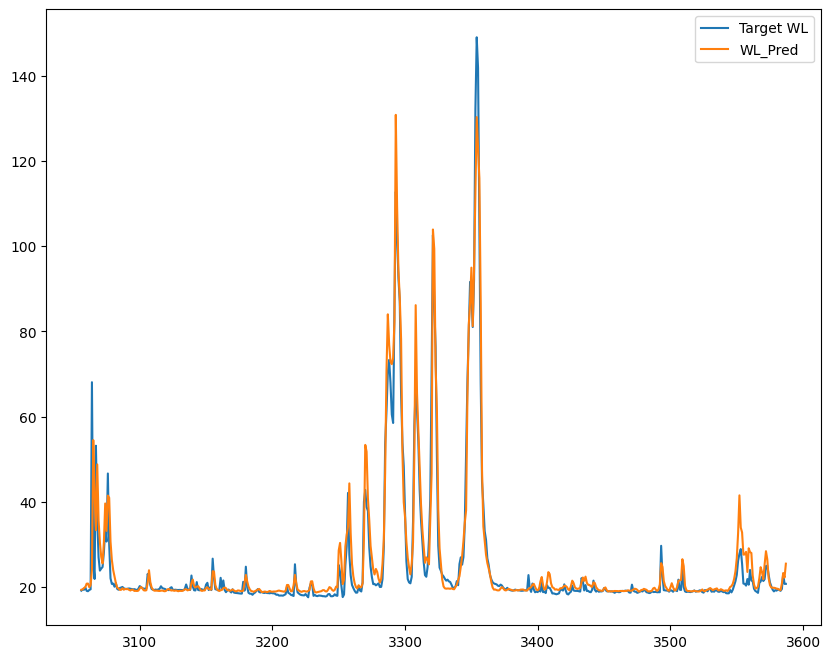

In [110]:
df_final[['Target WL','WL_Pred']][:].plot()